In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

from devinterp.optim import SGLD
from devinterp.slt.sampler import estimate_learning_coeff_with_summary
from devinterp.utils import plot_trace, default_nbeta

from rasp_models.palindrome import check_palindrome
from tracr.haiku_to_pytorch import haiku_to_pytorch, apply
from trainedmodels import *

from datasets.dataloaders import makePalindromeDataLoader
import matplotlib.pyplot as plt

In [ ]:
loader = makePalindromeDataLoader(10)
test_loader = makePalindromeDataLoader(10)
assembled_model = check_palindrome()

In [ ]:
model, results = train_model(loader, assembled_model, 10, test_loader, training_params=dict(lr=1e-2, weight_decay=1e-5, betas=(0.9,0.999), eps=1e-12), llc_dict=dict(lr=1e-5, loc=10, num_chains=3, num_draws=10))

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

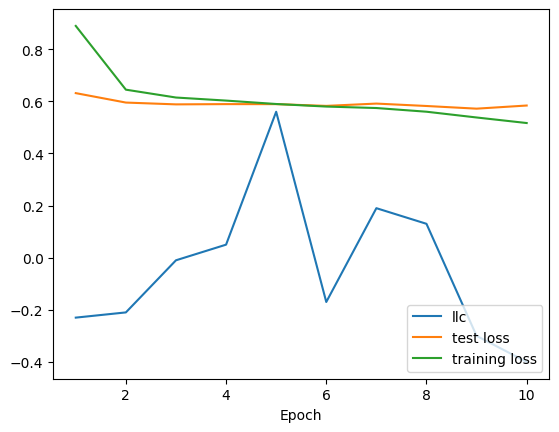

In [9]:
x = range(1, len(results['llc']) + 1)
plt.plot(x, results['llc'], label='llc')
plt.plot(x, results['test_loss'], label='test loss')
plt.plot(x, results['train_loss'], label='training loss')
plt.xlabel("Epoch")
plt.legend(loc='lower right')
plt.show()